In [1]:
import pandas as pd
import numpy as np

from data_processing_functions import *

from sktime.performance_metrics.forecasting import mean_absolute_error

# nice time series plots
from sktime.utils.plotting import plot_series

from sktime.forecasting.var import VAR

# from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
full_data = pd.read_csv("../../Data/Train/Clean/full_m3_monthly_micro_clean.csv", header=None, skiprows=1)
protected_full = pd.read_csv("../../Data/Train/Clean/protected_m3_monthly_micro_h1_DP_0.1.csv")
# convert to a list of series, potentially with different lengths
full_data = [x.dropna() for _, x in full_data.iterrows()]
protected_full = [x.dropna() for _, x in protected_full.iterrows()]
test = pd.read_csv("../../Outputs/Forecasts/Test_h1.csv")
orig_fcasts = pd.read_csv("../../Outputs/Forecasts/VAR_h1_original.csv")
protected_fcasts = pd.read_csv("../../Outputs/Forecasts/VAR_h1_DP_0.1.csv")

In [3]:
orig_maes = mean_absolute_error(test, orig_fcasts, multioutput="raw_values")

In [4]:
protected_maes = mean_absolute_error(test, protected_fcasts, multioutput="raw_values")

In [5]:
np.argsort(protected_maes)

array([ 16,  62, 359, 387, 383, 377, 283, 327, 436, 252,  70, 298, 201,
        61, 335,  55, 337, 459,  86, 253, 378, 276, 382, 395, 342, 259,
       333, 313, 126, 428, 249, 365, 178, 226, 315, 256, 187, 290, 302,
        44, 291, 398, 347,  15, 273,  60, 184, 203, 182, 197, 348,  14,
       362, 229, 334, 308, 312, 336, 247, 441, 306,  71, 183,   1, 271,
        17, 181, 295, 363, 199, 316, 294, 381,  59,  64, 345,  74, 202,
       437, 332, 420, 198, 141, 265, 266, 275, 470, 238, 410,  32, 404,
       431,  66, 130, 260, 405, 173, 467,  46, 460, 385,  89,  12, 300,
       343, 396, 349,  30, 322, 239,   5, 406,  31, 131, 361,  22, 412,
       228,  72, 210, 292, 145, 200, 464, 357,  57, 179,  67, 196,  13,
       450,  96, 257, 211, 413, 364, 446, 117, 243, 223, 215, 107,   6,
       325, 414,  69, 177,  63, 408, 444, 461, 305, 352,   7, 284, 455,
       407, 307, 246, 309,  25,  20, 175, 368, 213, 254, 277, 425, 205,
        36, 353, 326, 386, 415, 274, 251, 220, 219,  18,  26, 30

In [6]:
np.argsort(orig_maes - protected_maes)

array([270, 120, 158,  49, 234, 207, 214,  11, 465, 399, 366, 287, 148,
        98,  48,  19, 123, 204, 388,   4, 393, 227, 341, 289, 216, 324,
       400, 110, 185,  41, 338, 242, 299,  47, 454, 351, 236, 169, 473,
        91, 462, 329, 240, 134,  21, 268,  65, 339, 245,  58, 328, 193,
       296,  88, 434, 233, 101, 231,  68, 208,  40, 358, 320, 435, 429,
       423, 390, 384, 367, 114, 293, 369, 427, 401, 129, 255, 250, 433,
       355, 128, 186,   3, 119, 263, 225, 456,   0, 222, 297, 192, 206,
        24, 346, 132,  23, 360, 127,  37, 241, 278, 272, 340,  99, 354,
       180,  54,  29,  43,  10, 288,  87,  90, 230, 153,  85,  81, 432,
       469, 166, 164, 269, 103, 267,  34, 472,  42, 137, 156,  83, 264,
        79,  75, 102, 422, 152, 151, 453, 443, 457, 237,  76, 108, 417,
        92, 370, 419, 191, 157, 161, 331, 440, 430,  84, 373, 124, 424,
        53, 286, 165, 463, 466, 449, 389, 447, 149, 115, 248,  94, 147,
       280, 170, 411, 468, 258, 190, 380, 112, 439, 221,  82, 43

In [7]:
np.sort(orig_maes - protected_maes)

array([-6.11338694e+06, -4.05390003e+06, -3.87564943e+06, -2.35177767e+06,
       -1.61738937e+06, -1.23069522e+06, -7.34944611e+05, -5.75848851e+05,
       -5.39876010e+05, -5.19582285e+05, -5.15343529e+05, -5.08769795e+05,
       -4.52101621e+05, -4.26790376e+05, -4.12596109e+05, -4.09676557e+05,
       -3.67352875e+05, -3.66135164e+05, -3.53502422e+05, -3.30185030e+05,
       -2.86098794e+05, -2.72844341e+05, -2.51602336e+05, -2.51350339e+05,
       -2.41736461e+05, -2.39115407e+05, -2.37787268e+05, -2.16704419e+05,
       -2.04114462e+05, -1.89240934e+05, -1.83449228e+05, -1.78928922e+05,
       -1.76991334e+05, -1.74021134e+05, -1.66720294e+05, -1.56103252e+05,
       -1.55291858e+05, -1.52701055e+05, -1.52263842e+05, -1.50828686e+05,
       -1.38777650e+05, -1.37585906e+05, -1.30775244e+05, -1.27983876e+05,
       -1.26554044e+05, -1.22385457e+05, -1.22279413e+05, -1.22189137e+05,
       -1.20888081e+05, -1.07608947e+05, -1.04524133e+05, -1.01855852e+05,
       -9.92632070e+04, -

In [8]:
np.max(orig_maes)-np.min(orig_maes)

7633.547790190649

In [9]:
np.max(protected_maes) - np.min(protected_maes)

6114313.013023799

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='270'>)

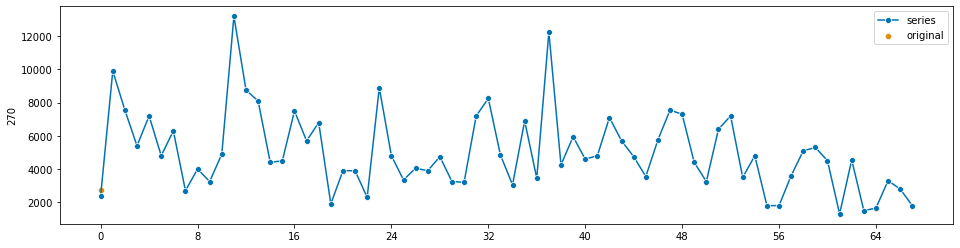

In [10]:
plot_series(full_data[270], orig_fcasts.iloc[:,270], labels = ["series", "original"])

C:\Users\Cameron\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='270'>)

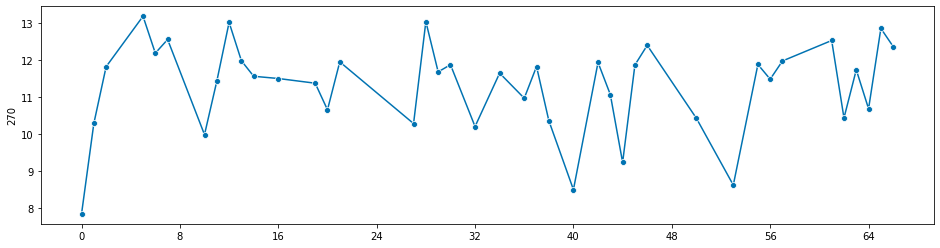

In [11]:
ps = protected_full[270]
ps.index = np.arange(0, len(ps))
plot_series(np.log(ps))

In [17]:
temp, _, _, _, full_lags = pre_process(protected_full[283:289], target_forecast_period=1, log=True, make_stationary=True, sp=12)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

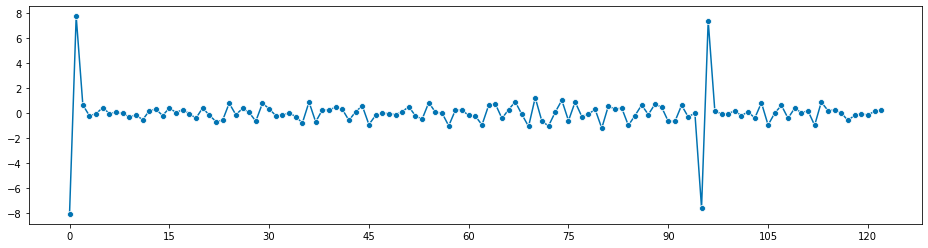

In [18]:
ps = temp[0]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

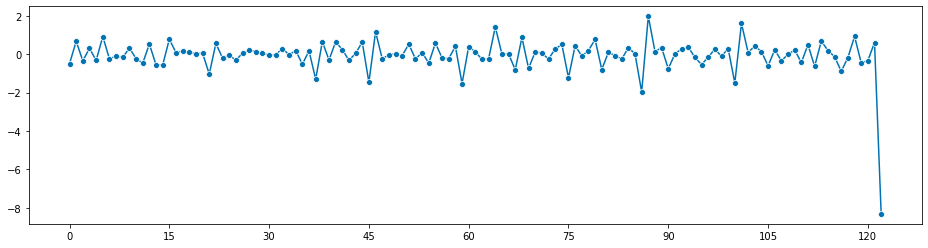

In [19]:
ps = temp[1]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

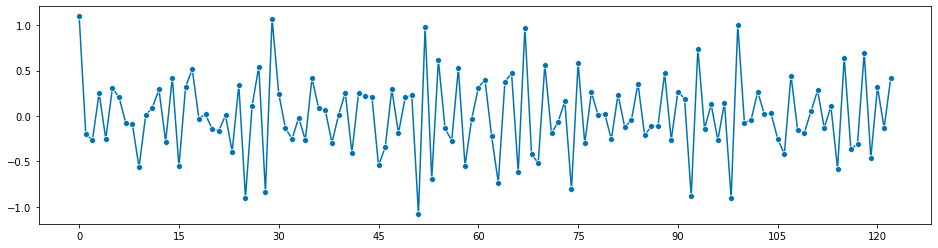

In [20]:
ps = temp[2]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

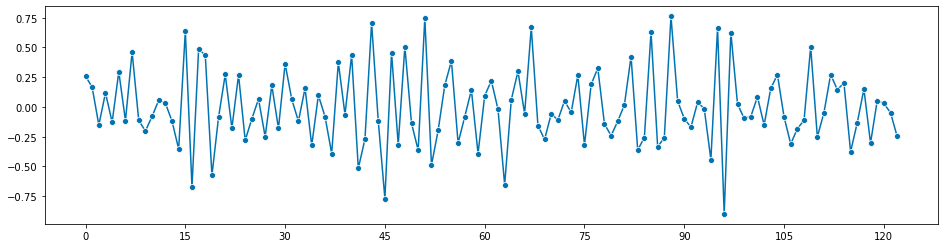

In [21]:
ps = temp[3]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

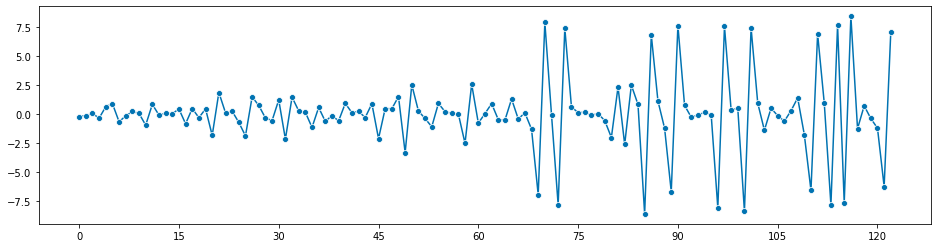

In [22]:
ps = temp[4]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

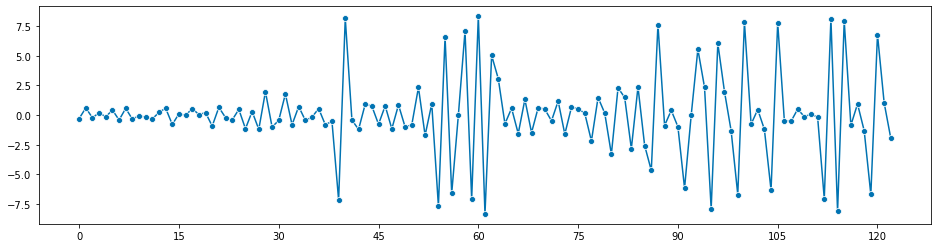

In [23]:
ps = temp[5]
ps.index = np.arange(0, len(ps))
plot_series(ps)

In [24]:
# convert list to TxK dataframe
group = pd.concat(temp, axis=1, ignore_index=True)

In [25]:
group

,0,1,2,3,4,5
0,-8.050717,-0.492680,1.098091,0.260123,-0.218488,-0.289442
1,7.727143,0.674917,-0.200249,0.164993,-0.136849,0.604788
2,0.652138,-0.345911,-0.264607,-0.151297,0.043803,-0.232265
3,-0.226004,0.311786,0.254194,0.118858,-0.352529,0.201822
4,-0.043878,-0.324548,-0.250767,-0.128281,0.624272,-0.149770
...,...,...,...,...,...,...
118,-0.185798,0.932522,0.697924,-0.303224,0.699102,-1.313529
119,-0.042757,-0.446721,-0.459366,0.053533,-0.385586,-6.688420
120,-0.173213,-0.332839,0.319185,0.030117,-1.218839,6.787925
121,0.147827,0.609483,-0.133030,-0.048125,-6.232595,1.040359


In [ ]:
forecaster = VAR(endog=group)
results = forecaster.fit(ic='bic', trend='c')

In [ ]:
results.summary()

In [ ]:
intercepts = results.coefs_exog

In [ ]:
# number of lags in VAR model
lag_order = results.k_ar

In [ ]:
lag_order

In [ ]:
# forecast nfs steps ahead using lag_order prior values
predictions = results.forecast(np.array(group[-lag_order:]), steps=1)

In [ ]:
predictions